In [1]:
from __future__ import print_function
import os
data_path = ['data']

In [2]:
import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

filepath = os.sep.join(data_path + ['Ames_Housing_Sales.csv'])
data = pd.read_csv(filepath)
data.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold,SalePrice
0,856.0,854.0,0.0,None,3,1Fam,TA,No,706.0,0.0,...,0.0,Pave,8,856.0,AllPub,0.0,2003,2003,2008,208500.0
1,1262.0,0.0,0.0,None,3,1Fam,TA,Gd,978.0,0.0,...,0.0,Pave,6,1262.0,AllPub,298.0,1976,1976,2007,181500.0
2,920.0,866.0,0.0,None,3,1Fam,TA,Mn,486.0,0.0,...,0.0,Pave,6,920.0,AllPub,0.0,2001,2002,2008,223500.0
3,961.0,756.0,0.0,None,3,1Fam,Gd,No,216.0,0.0,...,0.0,Pave,7,756.0,AllPub,0.0,1915,1970,2006,140000.0
4,1145.0,1053.0,0.0,None,4,1Fam,TA,Av,655.0,0.0,...,0.0,Pave,9,1145.0,AllPub,192.0,2000,2000,2008,250000.0


In [4]:
data = data[['1stFlrSF','GrLivArea', 'GarageYrBlt', 'YearBuilt', 'YearRemodAdd', 'SalePrice']]

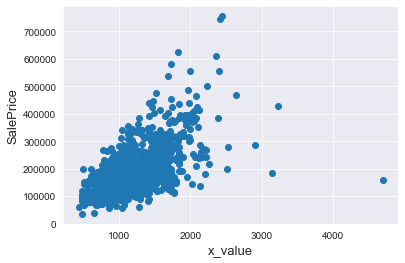

In [5]:
fig, ax = plt.subplots()
ax.scatter(x = data['1stFlrSF'], y = data['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('x_value', fontsize=13)
plt.show()

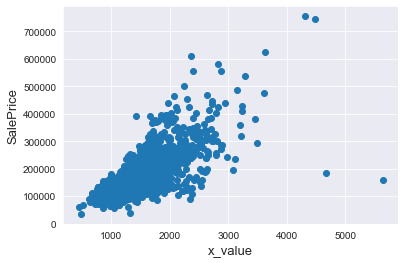

In [6]:
fig, ax = plt.subplots()
ax.scatter(x = data['GrLivArea'], y = data['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('x_value', fontsize=13)
plt.show()

In [7]:
#Deleting outliers
data = data.drop(data[(data['GrLivArea']>4000) & (data['SalePrice']<300000)].index)

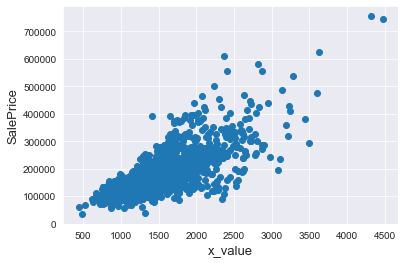

In [8]:
fig, ax = plt.subplots()
ax.scatter(x = data['GrLivArea'], y = data['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('x_value', fontsize=13)
plt.show()

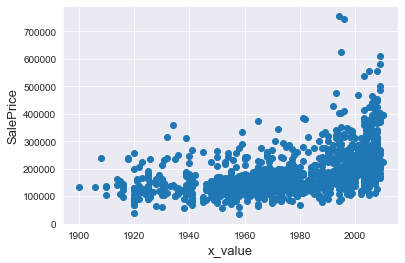

In [9]:
fig, ax = plt.subplots()
ax.scatter(x = data['GarageYrBlt'], y = data['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('x_value', fontsize=13)
plt.show()

In [10]:
data = data.drop(data[(data['GarageYrBlt']>1980) & (data['SalePrice']>600000)].index)

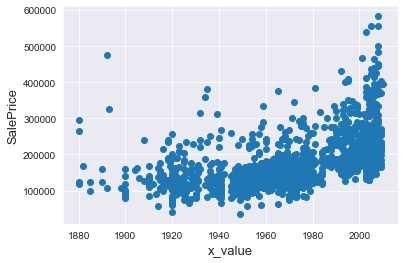

In [11]:
fig, ax = plt.subplots()
ax.scatter(x = data['YearBuilt'], y = data['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('x_value', fontsize=13)
plt.show()

In [12]:
data = data.drop(data[(data['YearBuilt']<1900) & (data['SalePrice']>300000)].index)

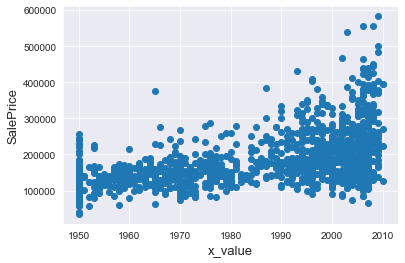

In [13]:
fig, ax = plt.subplots()
ax.scatter(x = data['YearRemodAdd'], y = data['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('x_value', fontsize=13)
plt.show()

In [14]:
data = data.drop(data[(data['YearRemodAdd']<1970) & (data['SalePrice']>300000)].index)

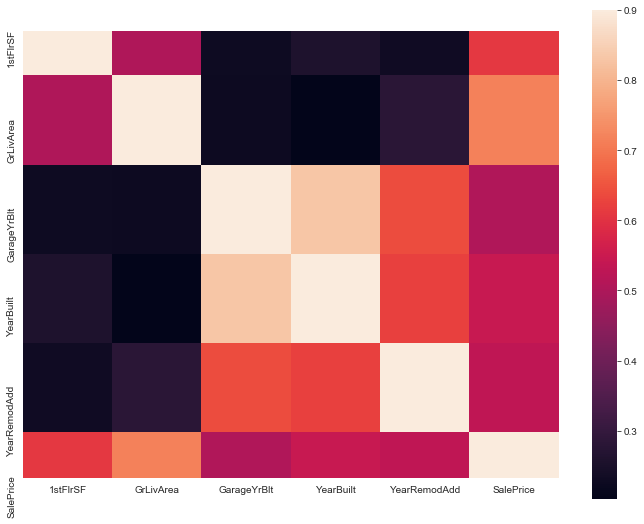

In [15]:
#Correlation map to see how features are correlated with SalePrice
corrmat = data.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=0.9, square=True)

In [16]:
print(data['SalePrice'].corr(data['1stFlrSF']))
print(data['SalePrice'].corr(data['GrLivArea']))
print(data['SalePrice'].corr(data['GarageYrBlt']))
print(data['SalePrice'].corr(data['YearBuilt']))
print(data['SalePrice'].corr(data['YearRemodAdd']))

0.6109528444284744
0.7149991207551504
0.5074385874642694
0.5454262248774684
0.5317321470193591


In [17]:
print(data['SalePrice'].corr(data['YearRemodAdd']))

0.5317321470193591


In [18]:
data.describe()

,1stFlrSF,GrLivArea,GarageYrBlt,YearBuilt,YearRemodAdd,SalePrice
count,1370.000000,1370.000000,1370.000000,1370.000000,1370.000000,1370.000000
mean,1168.837226,1520.304380,1978.397810,1972.956934,1985.360584,183591.123358
std,366.780163,481.064629,24.712757,29.250467,20.465044,73761.192470
min,438.000000,438.000000,1900.000000,1880.000000,1950.000000,35311.000000
25%,894.000000,1152.000000,1961.000000,1955.000000,1968.000000,133925.000000
50%,1097.000000,1478.000000,1979.500000,1976.000000,1994.000000,167120.000000
75%,1400.000000,1785.500000,2002.000000,2001.000000,2004.000000,216375.000000
max,3228.000000,3493.000000,2010.000000,2010.000000,2010.000000,582933.000000


In [19]:
x_data = data.drop('SalePrice', axis=1)
y_data = data['SalePrice']

In [20]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_data_sts = scaler.fit_transform(x_data)

In [21]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_data_mms = scaler.fit_transform(x_data)

from sklearn.decomposition import PCA
pca = PCA(n_components=3)
x_pca = pca.fit_transform(x_data_mms)

In [22]:
x_data_mms.shape

(1370, 5)

In [23]:
from sklearn.model_selection import train_test_split
y_data_log = np.log1p(y_data)

X_train, X_test, y_train, y_test = train_test_split(x_data_mms, y_data_log, test_size = 0.15, random_state=24)


from sklearn.feature_selection import SelectPercentile

# select = SelectPercentile(percentile=100) # 60프로 선택
# select.fit(x_data, y_data_log)    # 초기 데이터로 특성 선택
# X_train_selected = select.transform(X_train)
# X_test_selected = select.transform(X_test)

from sklearn import linear_model
model = linear_model.LinearRegression()
model.fit(X_train, y_train)     

print("훈련 세트 점수: {:.3f}".format(model.score(X_train, y_train)))
print("테스트 세트 점수: {:.3f}".format(model.score(X_test, y_test)))

훈련 세트 점수: 0.776
테스트 세트 점수: 0.809


In [24]:
from sklearn.metrics import mean_squared_error
from sklearn import linear_model
  
pred = model.predict(X_test)
y_pred = np.expm1(pred)
y_true = np.expm1(list(y_test))
#mean_squared_error(y_data, y_pred)  

# Root mean squared error
mse = mean_squared_error(y_true, y_pred)  
rmse = np.sqrt(mse)
rmse

34395.65671446549